In [36]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:



# load the data set
#url='https://drive.google.com/file/d/1PNqLQXezk3a4DhPIiUe51PGRhVmOiA8C/view'
#url='https://drive.google.com/uc?id=' + url.split('/')[-2]

dfred = pd.read_csv("wine_data/winequality-red.csv",sep = ";")
dfwhite = pd.read_csv("wine_data/winequality-white.csv", sep = ";")
dfred.head(10)





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [38]:
#New column to demoninate wine type
#Red = 0
#White = 1
dfred.insert(0,"wine_type","0")
dfwhite.insert(0,"wine_type", "1")


allwine_base_df = pd.concat([dfred,dfwhite], axis = 0, ignore_index=True)
#allwine_base_df.head(10)
allwine_base_df.head(10)


,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,0,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,0,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,0,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


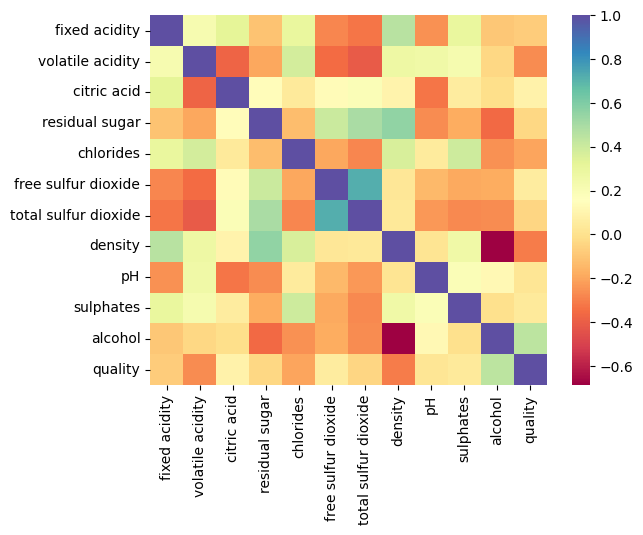

<Figure size 1500x1200 with 0 Axes>

In [39]:
#Target y data is ordinal (quality 1-9), encoding, splitting, removing outliers (very high quality wines), normalising/standardizing

#Do univariant analysis to evaluate where standarization and normalization are appropriate 

#First, heat map to evaluate features we see correlated to see what features need to be dropped 
#
#allwine_base_df.dtypes
dropped_type = allwine_base_df.drop(columns=["wine_type"],inplace=False)



# Find the correlation between variables and store than in a variable which
# will be used to create the heat map.
corr = dropped_type.corr()

allwines_heatmap = sns.heatmap(corr, annot=False, cmap='Spectral',)

plt.figure(figsize=(15,12))
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)


###Features to keep
#volatile acidity
#residual sugar
#chlorides
#total sulfur dioxide
#density
#alcohol



### Features to drop
#fixed acidity
#citric acid
#pH
#sulphates


#Target y: quality






In [40]:

###Features to keep
#volatile acidity
#residual sugar
#chlorides
#total sulfur dioxide
#density
#alcohol
df_ML = allwine_base_df.drop(columns=["fixed acidity","citric acid","pH","sulphates"],axis = 1, inplace = False )


df_ML.describe()

### Features to dropped
#fixed acidity
#citric acid
#pH
#sulphates


#Target y: quality

#NOTES:
#very high standard deviation in free sulfur dioxide (17.75) and especially in total sulfur dioxide (56.52)




,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.339666,5.443235,0.056034,30.525319,115.744574,0.994697,10.491801,5.818378
std,0.164636,4.757804,0.035034,17.749400,56.521855,0.002999,1.192712,0.873255
min,0.080000,0.600000,0.009000,1.000000,6.000000,0.987110,8.000000,3.000000
25%,0.230000,1.800000,0.038000,17.000000,77.000000,0.992340,9.500000,5.000000
50%,0.290000,3.000000,0.047000,29.000000,118.000000,0.994890,10.300000,6.000000
75%,0.400000,8.100000,0.065000,41.000000,156.000000,0.996990,11.300000,6.000000
max,1.580000,65.800000,0.611000,289.000000,440.000000,1.038980,14.900000,9.000000


In [41]:
print(allwine_base_df['quality'].astype(float).skew())

print(allwine_base_df['quality'].astype(float).kurt())

0.18962269337269683
0.2323222693432636


In [42]:
#categorize quality
allwine_base_df["quality_label"] = allwine_base_df['quality'].apply(lambda value: "poor"
                                                                if value <= 3 else "low"
                                                                if value <= 5 else "medium"
                                                                if value <= 6 else "high"
                                                                if value <= 7 else "exceptional") 

allwine_base_df["quality_label"] = pd.Categorical(allwine_base_df["quality_label"], categories = ["poor","low","medium","high","exceptional"])




In [43]:
#Proof of concept for encoder, decoding works too
from sklearn.preprocessing import LabelEncoder

# Sample data
qualities = ['low', 'medium', 'high']


# Initialize LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the data
le.fit(qualities)

# Transform the data into numerical labels
encoded_colors = le.transform(qualities)

print(encoded_colors)  # Output: [1, 0, 2, 1, 2]

# Inverse transform to get back the original categorical values
decoded_colors = le.inverse_transform(encoded_colors)

print(decoded_colors)  # Output: ['Red', 'Blue', 'Green', 'Red', 'Green']

[1 2 0]
['low' 'medium' 'high']


In [44]:
#Encode data 

#removed_outlier_qual = allwine_base_df.query("quality_label == 'low' or quality_label =='medium' or quality_label =='high'")
# Fit the LabelEncoder to the data
#le = LabelEncoder()
#fitted_qual_label = le.fit(removed_outlier_qual["quality_label"])


In [45]:
#Encode data 

removed_outlier_qual = allwine_base_df.query("quality_label == 'low' or quality_label =='medium' or quality_label =='high'")

# Initialize LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder to the data
le.fit(["low","medium","high"])

le.classes_

# Transform the data into numerical labels
removed_outlier_qual["quality_label"] = le.transform(removed_outlier_qual["quality_label"])

#encoded_colors = removed_outlier_qual["quality_label"]

removed_outlier_qual.head(5)
#encoded_colors.head(10)  # Output: [1, 0, 2, 1, 2]

# Inverse transform to get back the original categorical values
#decoded_colors = le.inverse_transform(encoded_colors)


C:\Users\Leon\AppData\Local\Temp\ipykernel_7876\3965976708.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outlier_qual["quality_label"] = le.transform(removed_outlier_qual["quality_label"])


,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [49]:

from sklearn.model_selection import train_test_split

X = removed_outlier_qual # --> the features we will keep to build our model
y = removed_outlier_qual["quality_label"] # --> what you're trying to predict

# Example:
y=X.quality_label
X.drop(['quality_label'],axis=1,inplace=False)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_test.describe()
#Massive variation in some data, so we will min max scale the results (except quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,7.258453,0.350670,0.322823,5.355104,0.059907,29.962121,114.540670,0.994822,3.215175,0.537344,10.436414,5.723285,1.267943
std,1.357331,0.170597,0.155510,4.560015,0.042522,17.322903,57.560291,0.002914,0.161127,0.157632,1.176515,0.777261,0.724649
min,4.400000,0.100000,0.000000,0.600000,0.016000,3.000000,6.000000,0.987220,2.720000,0.260000,8.400000,4.000000,0.000000
25%,6.400000,0.230000,0.242500,1.825000,0.039000,16.000000,71.250000,0.992545,3.110000,0.440000,9.500000,5.000000,1.000000
50%,7.000000,0.300000,0.310000,3.000000,0.049000,28.000000,118.000000,0.995080,3.200000,0.510000,10.200000,6.000000,1.000000
75%,7.700000,0.430000,0.410000,7.900000,0.071750,41.750000,156.000000,0.997000,3.310000,0.600000,11.200000,6.000000,2.000000
max,15.900000,1.115000,1.230000,20.700000,0.610000,131.000000,313.000000,1.003690,3.900000,2.000000,14.900000,7.000000,2.000000


In [ ]:
#Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)


In [33]:
#Check for skew

print(X_train.astype(float).skew())

print(X_train.astype(float).kurt())

#EXTREME skew in chlorides! do something here 


#print(X_test.astype(float).skew())

#print(y_test.astype(float).kurt())

#Mild skew in fixed acidity and sulphates but nothing too crazy. Fix chlorides in training data and you should be golden





wine_type              -1.184501
fixed acidity           1.696344
volatile acidity        1.459966
citric acid             0.458939
residual sugar          1.502423
chlorides               5.229401
free sulfur dioxide     0.712149
total sulfur dioxide   -0.046913
density                 0.641960
pH                      0.376239
sulphates               1.705480
alcohol                 0.582913
quality                -0.029800
dtype: float64
wine_type               -0.597196
fixed acidity            4.878603
volatile acidity         2.498729
citric acid              2.550377
residual sugar           5.229001
chlorides               49.752205
free sulfur dioxide      0.684838
total sulfur dioxide    -0.573966
density                  8.838782
pH                       0.358236
sulphates                7.724781
alcohol                 -0.491179
quality                 -0.575982
dtype: float64


In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
#
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
#Check if data is normalised 
X_train_stand.describe()
X_test_stand.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.033839,0.079559,0.039021,-0.023947,0.132207,-0.028590,-0.024850,0.025302,-0.022753,0.045635,-0.020125,5.723285,1.267943
std,1.060076,1.051964,1.080788,0.944424,1.287750,1.000698,1.022561,0.974097,1.003861,1.080350,1.006265,0.777261,0.724649
min,-2.198613,-1.466159,-2.204583,-1.008776,-1.197507,-1.586120,-1.953079,-2.516086,-3.107827,-1.855176,-1.761857,4.000000,0.000000
25%,-0.636613,-0.664533,-0.519220,-0.755066,-0.500965,-0.835144,-0.793910,-0.735901,-0.678024,-0.621526,-0.821034,5.000000,1.000000
50%,-0.168012,-0.232889,-0.050098,-0.511712,-0.198120,-0.141936,0.036605,0.111567,-0.117300,-0.141773,-0.222328,6.000000,1.000000
75%,0.378688,0.568737,0.644897,0.503126,0.490851,0.652365,0.711677,0.753436,0.568029,0.475051,0.632966,6.000000,2.000000
max,6.782890,4.792686,6.343857,3.154133,16.791459,5.808102,3.500788,2.989950,4.243884,10.070104,3.797552,7.000000,2.000000


In [ ]:
  #Random Forest MACHINE LEARNING MODEL
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

RF_clf = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state=453)

RF_clf.fit(X_train_stand,y_train)

RandomForestClassifier(criterion="entropy",random_state=101)
preds = RF_clf.predict(X_test)

###MACHINE LEARNING MODEL EVALUATION### 
acc = accuracy_score(y_test,preds)
print(acc)



#Random Forest is great for this, even the original (no normalisation or standardisation) is easily predicted at 1.0,
#  where with the logirithmic prediction below, there is a 62 % accuracy for the un-normalized prediction 
# (normalization needed for good results from a logistic regression algorithm)



1.0


In [55]:
#IMPORT STATEMENT CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test,preds)
# outputs a matrix for each row and how many times it got the prediction right
#output: array([Actual NEG VAL PREDICTED how many WRONG, ACTUAL NEG VAL HOW MANY PREDICTED RIGHT,
#                ACTUAL POS VAL PREDICTED how many WRONG, ACTUAL POS VAL HOW MANY PREDICTED RIGHT])
            #Look at diagonal 
            # (negative) diagonal: "ACTUAL TRUE predictions"
            # (positive) diagonal: "PREDICTED that were wrong"

array([[206,   0,   0],
       [  0, 506,   0],
       [  0,   0, 542]], dtype=int64)

In [79]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression

LR_model = LogisticRegression(random_state = 42, max_iter = 100) # you cant really overshoot, it just takes longer, the more rows you have, if you have a large max_iter


#fit model
LR_model.fit(X_train_stand,y_train)
LogisticRegression(max_iter= 100, random_state=42)

#predicitions
#preds = LR_model.predict(X_test) #Outputs an array of predictions 
preds = LR_model.predict(X_test_stand) #Outputs an array of predictions for STANDARDIZED data(NOT a DF!!!)

    #uses an x_test_stand or X_test to work with the rows from the df we inputed, the series is indexed according to the index of the dataframe,
    #  so you can refer back to the original data



acc = accuracy_score(y_test, preds)
print(acc)
#Accuracy for "not standardized" data is 62% prediction correctness rate (true positive),
#100% with standardization, standardization needed for log reg




1.0
